# Distribuciones en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
def ring(r_min=0, r_max=1, n_samples=360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

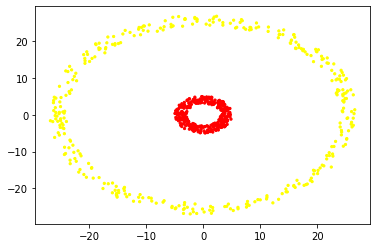

In [3]:
data1 = ring(r_min=3, r_max=5)
data2 = ring(r_min=24, r_max=27)
data = np.concatenate([data1, data2], axis=0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:, 0], data[:, 1], c=labels, s=5, cmap="autumn")
plt.show()

# Algoritmo con Kmeans

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(2).fit(data)

In [6]:
clust = km.predict(data)

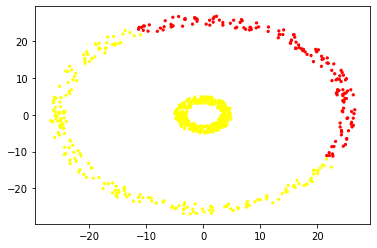

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=clust, s=5, cmap="autumn")
plt.show()

# Algoritmo de los K Medoides

In [8]:
from pyclust import KMedoids

In [9]:
kmed = KMedoids(2).fit_predict(data)

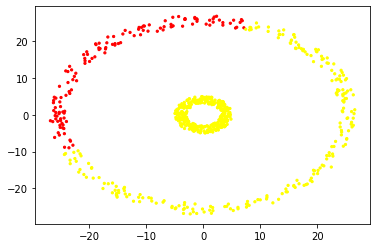

In [10]:
plt.scatter(data[:, 0], data[:, 1], c=kmed, s=5, cmap="autumn")
plt.show()

No ha cambiado nada

# Algoritmo del Clustering Espectral

In [11]:
from sklearn.cluster import SpectralClustering

In [12]:
clust = SpectralClustering(2).fit_predict(data)

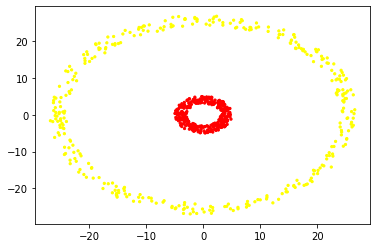

In [13]:
plt.scatter(data[:, 0], data[:, 1], c=clust, s=5, cmap="autumn")
plt.show()

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral